In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [127]:
!pip install sklearn

In [128]:
!pip install openpyxl

In [129]:
df = pd.read_excel('КР-2.xlsx', sheet_name='Вар (2)')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Успех                             69 non-null     object 
 1   Торговельна площа, кв. м.         69 non-null     float64
 2   Этаж                              69 non-null     int64  
 3   Тип                               69 non-null     object 
 4   Количество касс                   69 non-null     int64  
 5   Рейтинг в гуглі                   69 non-null     float64
 6   Количество чеков                  62 non-null     float64
 7   Средний чек                       62 non-null     float64
 8   Офіси                             64 non-null     float64
 9   Середній дохід наелення,грн       64 non-null     float64
 10  Магазин мобільного звязку         69 non-null     int64  
 11  Продуктовий ринок                 69 non-null     int64  
 12  Речовий ри

In [131]:
df

,Успех,"Торговельна площа, кв. м.",Этаж,Тип,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,не успішний,9.00,1,МАФ,1,3.0,659.0,76.85,1092.0,13884.0,0,0,0,0,1
1,не успішний,22.00,1,МАФ,1,4.1,1518.0,84.86,348.0,11700.0,0,0,0,1,1
2,не успішний,13.00,1,МАФ,1,3.0,476.0,112.02,504.0,6786.0,0,0,0,1,1
3,не успішний,18.00,1,МАФ,1,3.0,1310.0,119.80,418.0,12948.0,0,0,0,1,1
4,не успішний,25.00,1,Вбудоване приміщення,1,4.0,2029.0,94.88,108.0,11427.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,40.78,1,МАФ,2,4.0,6884.0,107.37,337.0,9399.0,0,0,0,0,0
65,успішний,21.50,1,МАФ,1,2.3,4721.0,89.13,668.0,14079.0,0,1,1,0,0
66,не успішний,115.23,1,МАФ,1,3.0,3286.0,105.62,295.0,11427.0,0,0,0,0,0
67,не успішний,34.80,1,Вбудоване приміщення,2,4.3,3963.0,168.07,0.0,13338.0,0,1,1,0,0


In [132]:
# Есть пропущенные значенпия в переменныъ: "Количество чеков", "Средний чек", "Офіси","Середній дохід наелення,грн".

In [133]:
# Dataset Statistics
df.describe()

,"Торговельна площа, кв. м.",Этаж,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
count,69.000000,69.0,69.000000,69.000000,62.000000,62.000000,64.000000,64.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,34.872145,1.0,1.231884,3.810145,4079.741935,95.897581,439.875000,11306.843750,0.057971,0.173913,0.130435,0.101449,0.362319
std,21.704293,0.0,0.458416,0.695605,2334.254653,19.192685,459.930792,2438.706261,0.235401,0.381812,0.339248,0.304135,0.484192
min,4.000000,1.0,1.000000,1.800000,476.000000,65.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.0,1.000000,3.000000,2057.250000,82.420000,117.000000,10095.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.500000,1.0,1.000000,4.000000,3876.500000,93.855000,313.500000,11680.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,1.0,1.000000,4.300000,5214.250000,102.787500,662.000000,13074.750000,0.000000,0.000000,0.000000,0.000000,1.000000
max,119.300000,1.0,3.000000,5.000000,9687.000000,168.070000,2185.000000,14937.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
#Переменная "Этаж" принимает только одно значение; "Середній дохід населення" не должен принимать значение "0".

In [135]:
# Drop useless
df = df.drop(['Этаж'], axis='columns', inplace=False)

In [136]:
# Cheking Missing data
df.isnull().sum()

Успех                               0
Торговельна площа, кв. м.           0
Тип                                 0
Количество касс                     0
Рейтинг в гуглі                     0
Количество чеков                    7
Средний чек                         7
Офіси                               5
Середній дохід наелення,грн         5
Магазин мобільного звязку           0
Продуктовий ринок                   0
Речовий ринок                       0
Транзитна зупинка міжміського ГТ    0
Зупинка ГТ                          0
dtype: int64

In [137]:
dfm = df

from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Средний чек']] = imputer_mean.fit_transform(dfm[['Средний чек']]).round()
dfm[['Количество чеков']] = imputer_mean.fit_transform(dfm[['Количество чеков']]).round()
dfm[['Офіси']] = imputer_mean.fit_transform(dfm[['Офіси']]).round()
dfm[['Середній дохід наелення,грн']] = imputer_mean.fit_transform(dfm[['Середній дохід наелення,грн']]).round()

In [138]:
dfm.isnull().sum()

Успех                               0
Торговельна площа, кв. м.           0
Тип                                 0
Количество касс                     0
Рейтинг в гуглі                     0
Количество чеков                    0
Средний чек                         0
Офіси                               0
Середній дохід наелення,грн         0
Магазин мобільного звязку           0
Продуктовий ринок                   0
Речовий ринок                       0
Транзитна зупинка міжміського ГТ    0
Зупинка ГТ                          0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

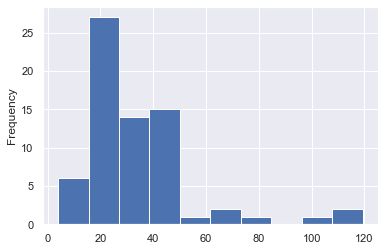

In [139]:
df['Торговельна площа, кв. м.'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

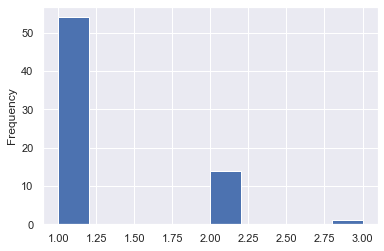

In [140]:
df['Количество касс'].plot(kind = 'hist')

In [141]:
#Мы видим, что кол-во касс больше 2 для нашей выборки нетипично.

In [142]:
df = df.drop(df[df['Количество касс'] > 2].index)

<AxesSubplot:ylabel='Frequency'>

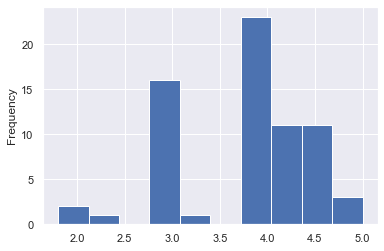

In [143]:
df['Рейтинг в гуглі'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

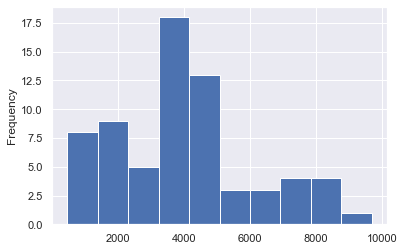

In [144]:
df['Количество чеков'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

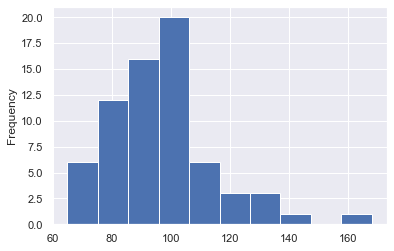

In [145]:
df['Средний чек'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

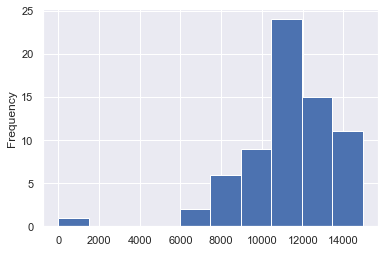

In [146]:
df['Середній дохід наелення,грн'].plot(kind = 'hist')

In [147]:
# Mistakes Deleting
df = df.loc[df['Середній дохід наелення,грн'] > 6000]

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 68
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Успех                             67 non-null     object 
 1   Торговельна площа, кв. м.         67 non-null     float64
 2   Тип                               67 non-null     object 
 3   Количество касс                   67 non-null     int64  
 4   Рейтинг в гуглі                   67 non-null     float64
 5   Количество чеков                  67 non-null     float64
 6   Средний чек                       67 non-null     float64
 7   Офіси                             67 non-null     float64
 8   Середній дохід наелення,грн       67 non-null     float64
 9   Магазин мобільного звязку         67 non-null     int64  
 10  Продуктовий ринок                 67 non-null     int64  
 11  Речовий ринок                     67 non-null     int64  
 12  Транзитна 

In [149]:
df

,Успех,"Торговельна площа, кв. м.",Тип,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,не успішний,9.00,МАФ,1,3.0,659.0,77.0,1092.0,13884.0,0,0,0,0,1
1,не успішний,22.00,МАФ,1,4.1,1518.0,85.0,348.0,11700.0,0,0,0,1,1
2,не успішний,13.00,МАФ,1,3.0,476.0,112.0,504.0,6786.0,0,0,0,1,1
3,не успішний,18.00,МАФ,1,3.0,1310.0,120.0,418.0,12948.0,0,0,0,1,1
4,не успішний,25.00,Вбудоване приміщення,1,4.0,2029.0,95.0,108.0,11427.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,40.78,МАФ,2,4.0,6884.0,107.0,337.0,9399.0,0,0,0,0,0
65,успішний,21.50,МАФ,1,2.3,4721.0,89.0,668.0,14079.0,0,1,1,0,0
66,не успішний,115.23,МАФ,1,3.0,3286.0,106.0,295.0,11427.0,0,0,0,0,0
67,не успішний,34.80,Вбудоване приміщення,2,4.3,3963.0,168.0,0.0,13338.0,0,1,1,0,0


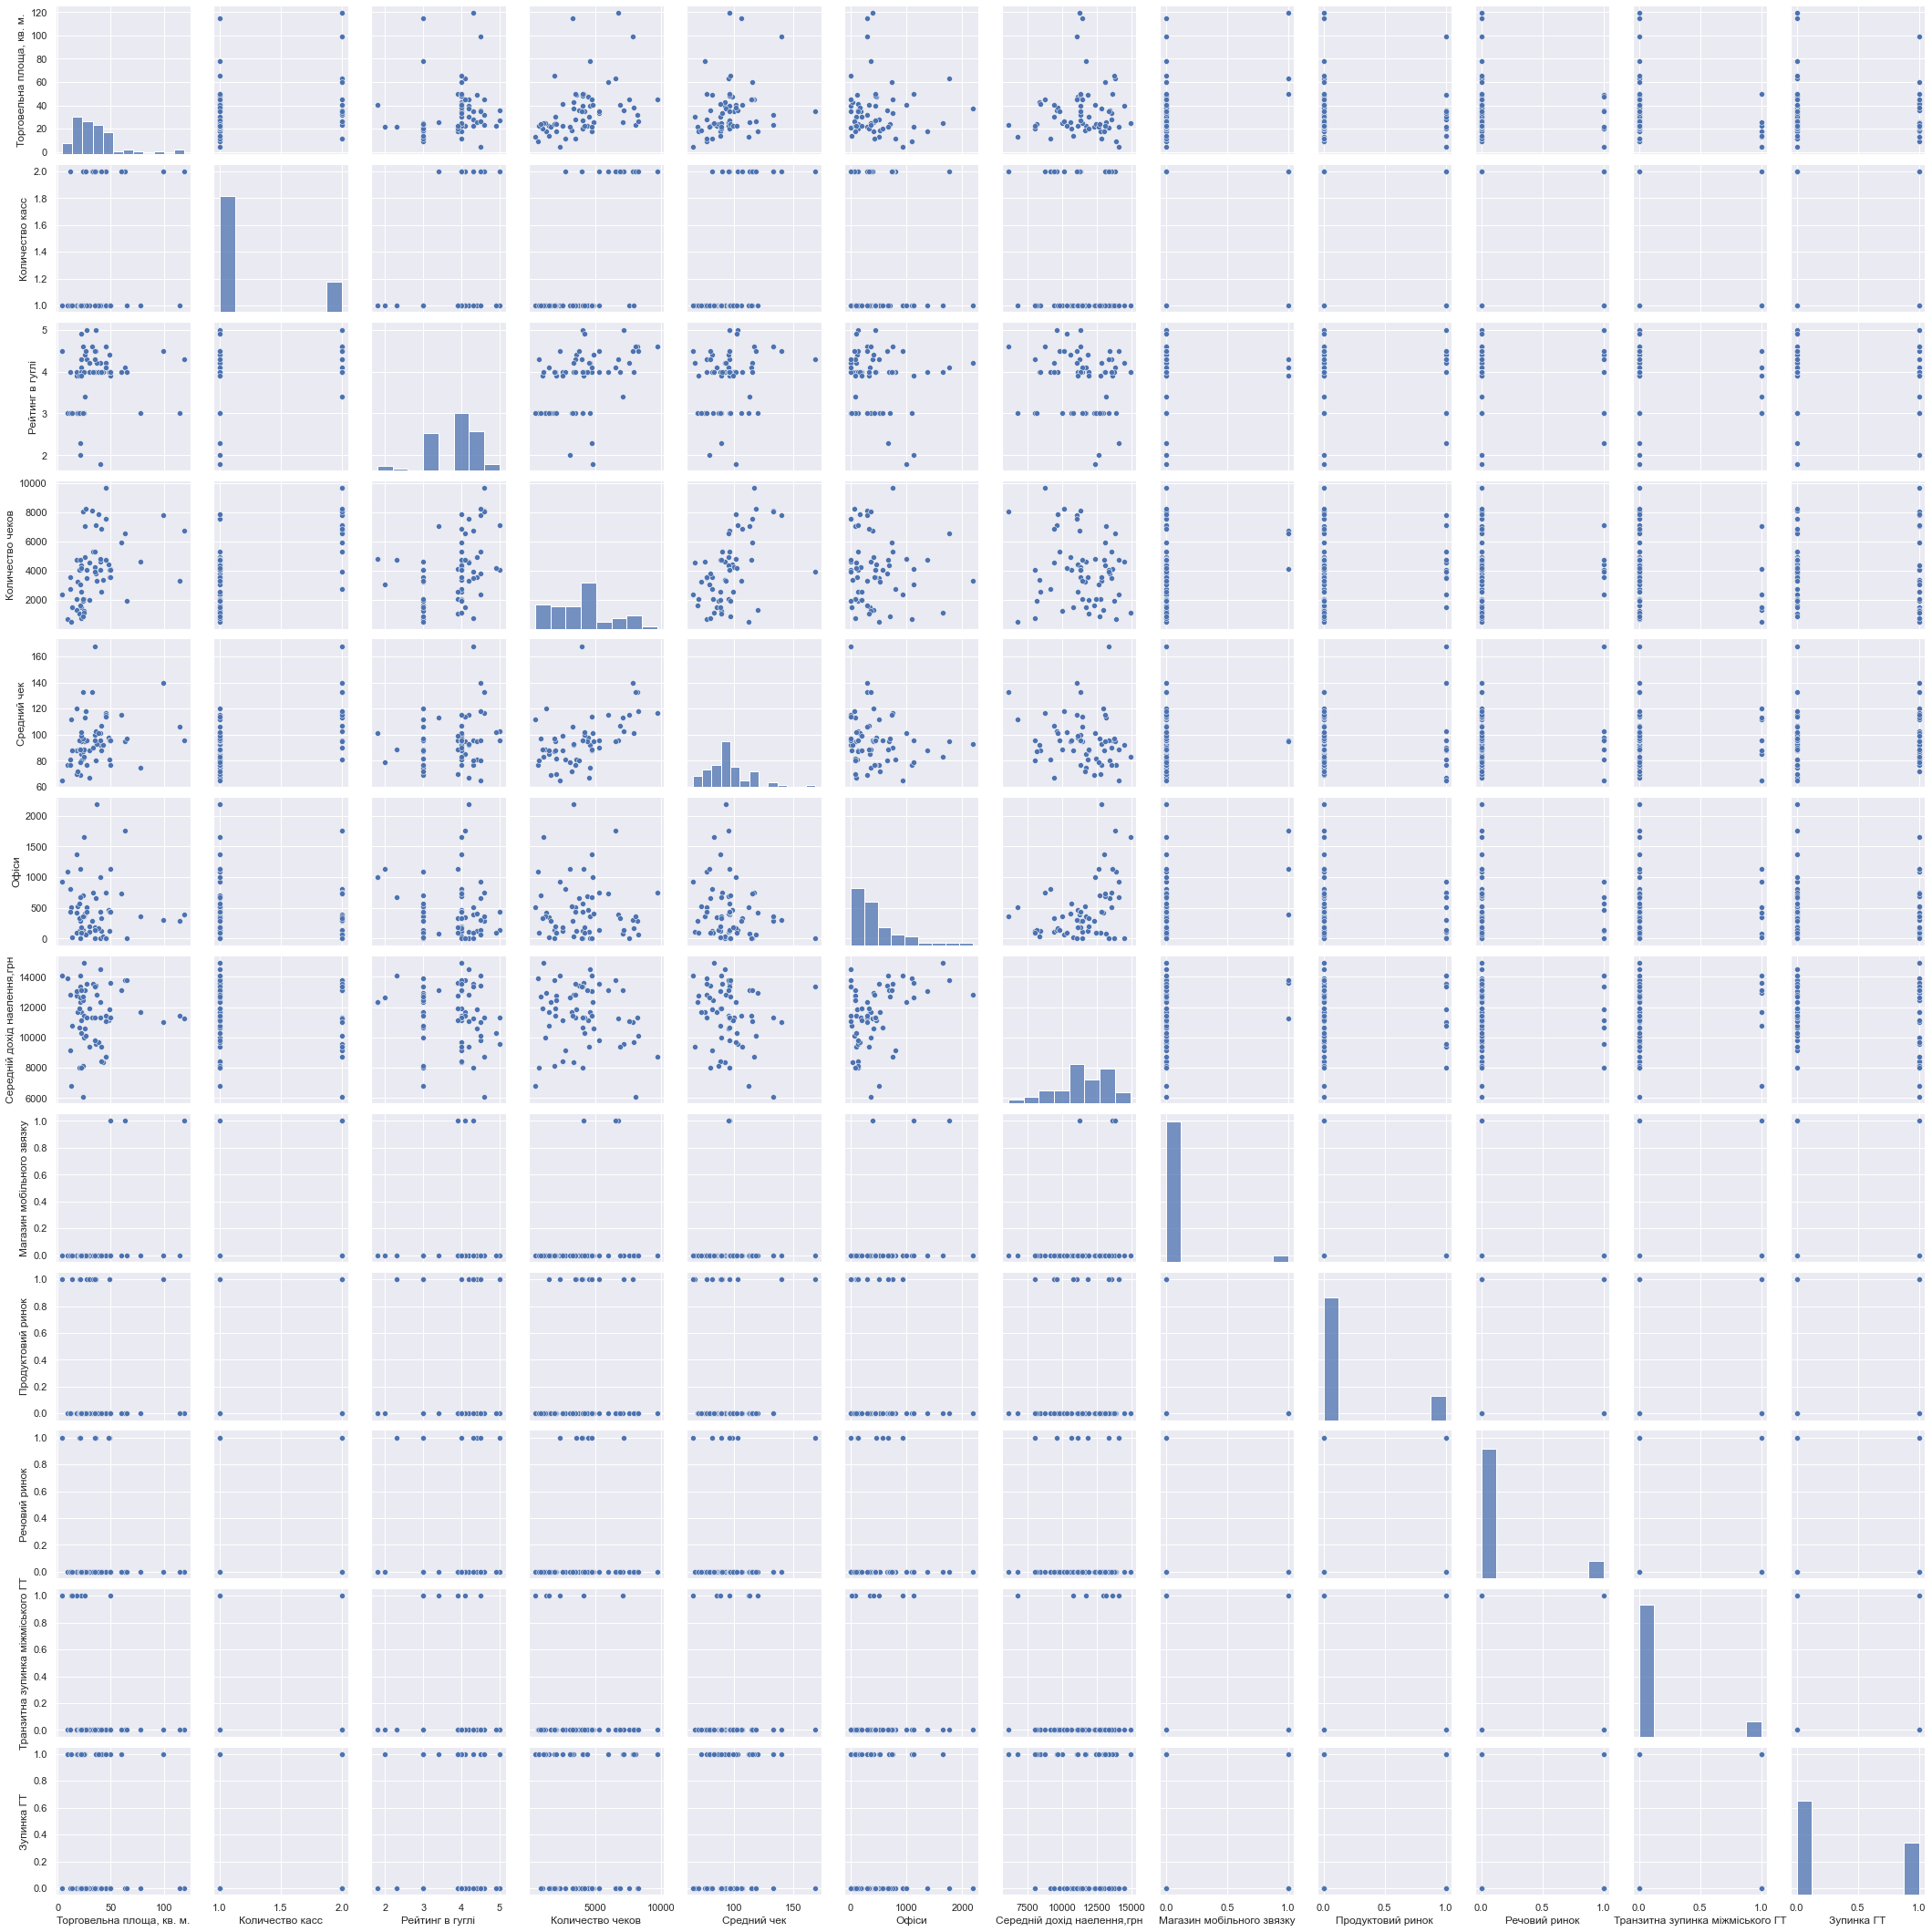

In [150]:
import seaborn as sns
sns.set()
sns.pairplot(df)

In [151]:
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [152]:
df3 = df[['Тип', 'Успех']]
info = []
for column in df3.columns:
        vals = {"col": column,
                "nunique": df3[column].nunique(),
                "unique": df3[column].unique(),
                "type": df3[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
1,Успех,2,"[не успішний, успішний]",object
0,Тип,3,"[МАФ, Вбудоване приміщення, Острівок на ринку]",object


In [153]:
dfm['Успех'].value_counts()

не успішний    44
успішний       25
Name: Успех, dtype: int64

In [154]:
success = {'не успішний':0,'успішний':1}
dfm['Успех'] = dfm['Успех'].map(success)

In [155]:
dfm['Тип'].value_counts()

МАФ                     39
Вбудоване приміщення    29
Острівок на ринку        1
Name: Тип, dtype: int64

In [156]:
type = {'МАФ':0,'Вбудоване приміщення':1, 'Острівок на ринку':0}
dfm['Тип'] = dfm['Тип'].map(type)

In [157]:
dfm

,Успех,"Торговельна площа, кв. м.",Тип,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,0,9.00,0,1,3.0,659.0,77.0,1092.0,13884.0,0,0,0,0,1
1,0,22.00,0,1,4.1,1518.0,85.0,348.0,11700.0,0,0,0,1,1
2,0,13.00,0,1,3.0,476.0,112.0,504.0,6786.0,0,0,0,1,1
3,0,18.00,0,1,3.0,1310.0,120.0,418.0,12948.0,0,0,0,1,1
4,0,25.00,1,1,4.0,2029.0,95.0,108.0,11427.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,40.78,0,2,4.0,6884.0,107.0,337.0,9399.0,0,0,0,0,0
65,1,21.50,0,1,2.3,4721.0,89.0,668.0,14079.0,0,1,1,0,0
66,0,115.23,0,1,3.0,3286.0,106.0,295.0,11427.0,0,0,0,0,0
67,0,34.80,1,2,4.3,3963.0,168.0,0.0,13338.0,0,1,1,0,0


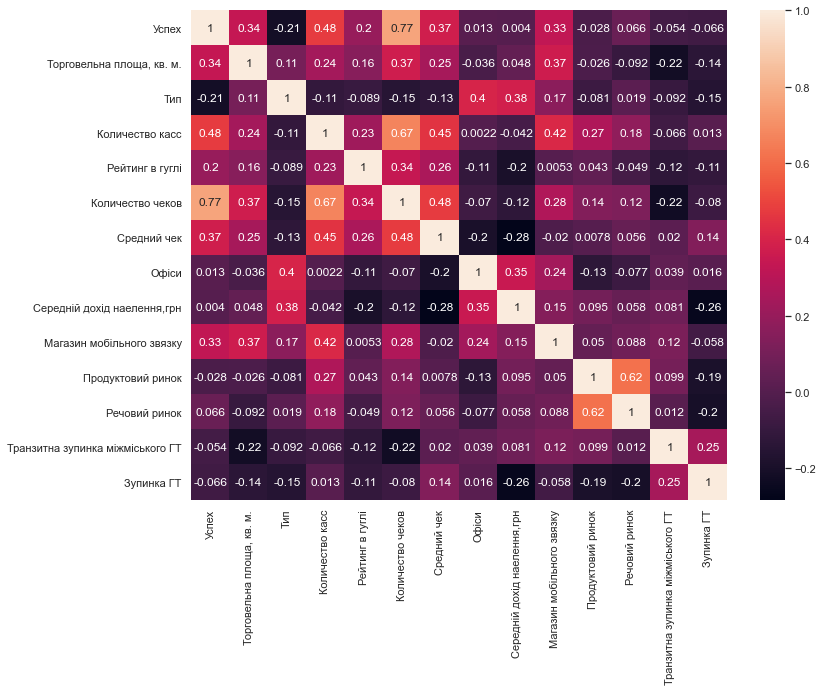

In [158]:
# Cheking correlations
import seaborn as sns
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

In [159]:
#"Успех" больше всего коррелирует с переменными "Рейтинг в гуглі" и "Количество касс".

In [160]:
df

,Успех,"Торговельна площа, кв. м.",Тип,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,не успішний,9.00,МАФ,1,3.0,659.0,77.0,1092.0,13884.0,0,0,0,0,1
1,не успішний,22.00,МАФ,1,4.1,1518.0,85.0,348.0,11700.0,0,0,0,1,1
2,не успішний,13.00,МАФ,1,3.0,476.0,112.0,504.0,6786.0,0,0,0,1,1
3,не успішний,18.00,МАФ,1,3.0,1310.0,120.0,418.0,12948.0,0,0,0,1,1
4,не успішний,25.00,Вбудоване приміщення,1,4.0,2029.0,95.0,108.0,11427.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,40.78,МАФ,2,4.0,6884.0,107.0,337.0,9399.0,0,0,0,0,0
65,успішний,21.50,МАФ,1,2.3,4721.0,89.0,668.0,14079.0,0,1,1,0,0
66,не успішний,115.23,МАФ,1,3.0,3286.0,106.0,295.0,11427.0,0,0,0,0,0
67,не успішний,34.80,Вбудоване приміщення,2,4.3,3963.0,168.0,0.0,13338.0,0,1,1,0,0


In [161]:
# Removing Correlated Data
df = df.drop(['Транзитна зупинка міжміського ГТ'], axis='columns', inplace=False)
df = df.drop(['Продуктовий ринок'], axis='columns', inplace=False)
df = df.drop(['Речовий ринок'], axis='columns', inplace=False)
df = df.drop(['Зупинка ГТ'], axis='columns', inplace=False)
df.shape

(67, 10)

In [162]:
a = ['Торговельна площа, кв. м.', 'Количество касс','Тип', 'Рейтинг в гуглі', 'Количество чеков', 'Средний чек']

In [163]:
from sklearn.model_selection import train_test_split
col = ['Количество касс', 'Количество чеков']
X =dfm[col]
y = dfm['Успех']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [164]:
# Function Max Leaf
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

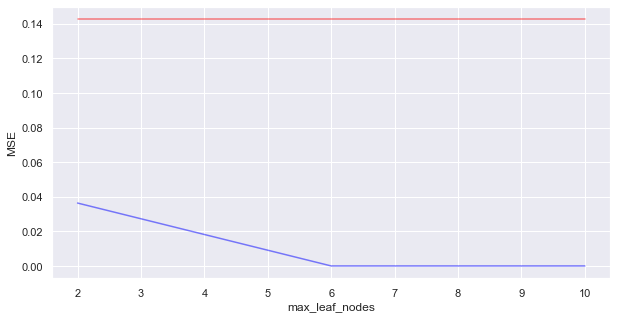

In [165]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [166]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 6, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [167]:
# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

0.8571428571428571

In [168]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9 2]
 [0 3]]


In [169]:
#Обнаружено 2 ошибки

Text(0.5, 1.0, 'Boosting. Feature Importance')

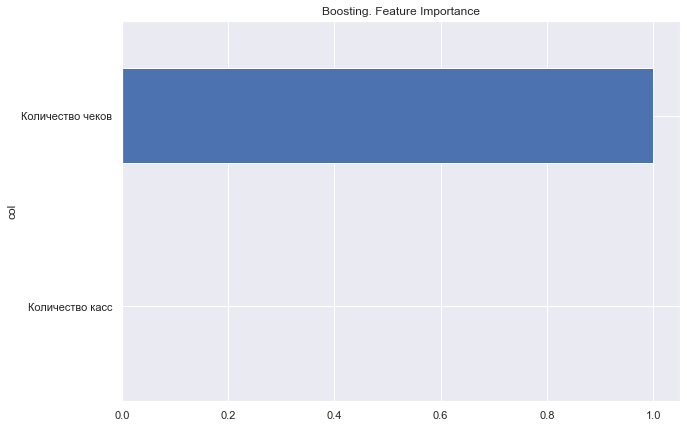

In [170]:
# Features importances
ct_imp = pd.DataFrame({'imp': ct.feature_importances_, 'col': col})
ct_imp = ct_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
ct_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


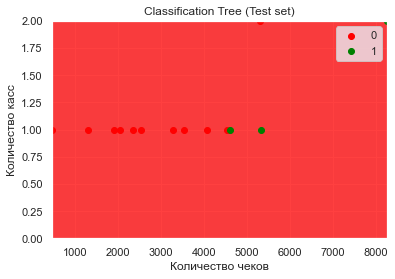

In [171]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков'].min() - 1, stop = X_set['Количество чеков'].max() + 1),
                     np.arange(start = X_set['Количество касс'].min() - 1, stop = X_set['Количество касс'].max() + 1))
plt.contourf(X1, X2, ct.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков'][y_set == j], X_set['Количество касс'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification Tree (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Количество касс')
plt.legend()
plt.show()

In [172]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

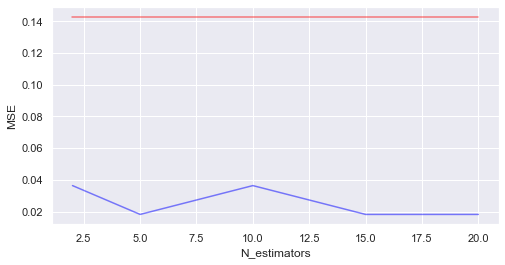

In [173]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [174]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=5, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

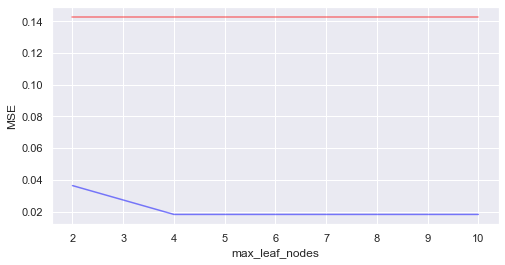

In [175]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])


In [176]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, max_leaf_nodes = 6, random_state = 10).fit(X_train, y_train)

In [177]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test).round(3)

0.857

In [178]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9 2]
 [0 3]]


In [179]:
#Обнаружено 2 ошибки

Text(0.5, 1.0, 'Boosting. Feature Importance')

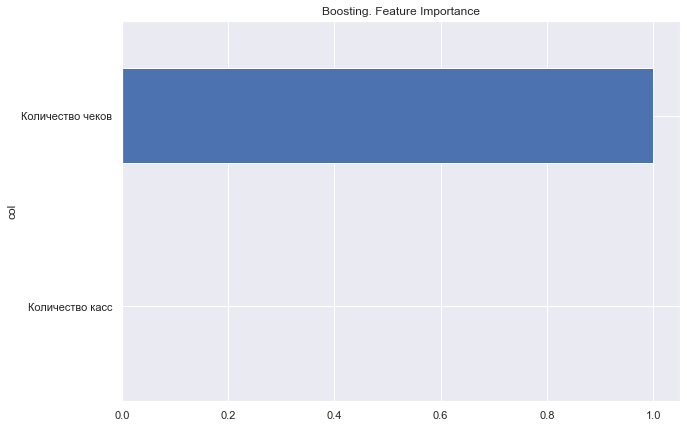

In [180]:
# Features importances
ct_imp = pd.DataFrame({'imp': ct.feature_importances_, 'col': col})
ct_imp = ct_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
ct_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


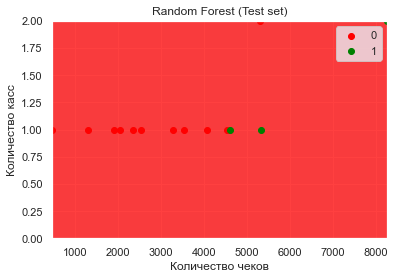

In [181]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков'].min() - 1, stop = X_set['Количество чеков'].max() + 1),
                     np.arange(start = X_set['Количество касс'].min() - 1, stop = X_set['Количество касс'].max() + 1))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков'][y_set == j], X_set['Количество касс'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Количество касс')
plt.legend()
plt.show()

In [182]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [183]:
# Encoding categorical data
df = encoding_char(df)

In [184]:
df

,Успех,"Торговельна площа, кв. м.",Тип,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,"Середній дохід наелення,грн",Магазин мобільного звязку
0,0,9.00,0,1,3.0,659.0,77.0,1092.0,13884.0,0
1,0,22.00,0,1,4.1,1518.0,85.0,348.0,11700.0,0
2,0,13.00,0,1,3.0,476.0,112.0,504.0,6786.0,0
3,0,18.00,0,1,3.0,1310.0,120.0,418.0,12948.0,0
4,0,25.00,1,1,4.0,2029.0,95.0,108.0,11427.0,0
...,...,...,...,...,...,...,...,...,...,...
64,1,40.78,0,2,4.0,6884.0,107.0,337.0,9399.0,0
65,1,21.50,0,1,2.3,4721.0,89.0,668.0,14079.0,0
66,0,115.23,0,1,3.0,3286.0,106.0,295.0,11427.0,0
67,0,34.80,1,2,4.3,3963.0,168.0,0.0,13338.0,0


In [185]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Успех','Торговельна площа, кв. м.', 'Количество касс','Тип', 'Рейтинг в гуглі', 'Количество чеков', 'Средний чек']).round(2)

ValueError: Shape of passed values is (67, 10), indices imply (67, 7)

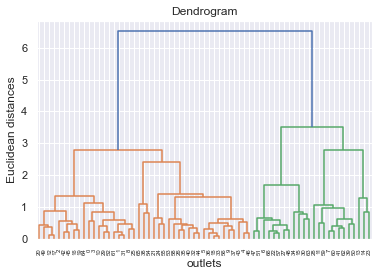

In [186]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('outlets')
plt.ylabel('Euclidean distances')
plt.show()

In [192]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [193]:
hc

array([1, 1, 1, 1, 2, 2, 0, 4, 1, 2, 1, 4, 1, 3, 3, 0, 1, 1, 2, 1, 1, 2,
       0, 3, 2, 1, 2, 0, 4, 1, 0, 1, 2, 2, 0, 2, 2, 2, 5, 4, 2, 4, 1, 2,
       2, 1, 2, 0, 0, 1, 4, 0, 1, 2, 5, 2, 2, 0, 2, 4, 4, 1, 4, 0, 1, 5,
       0], dtype=int64)

In [194]:
X = df.iloc[:, [0, 2, 5]]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

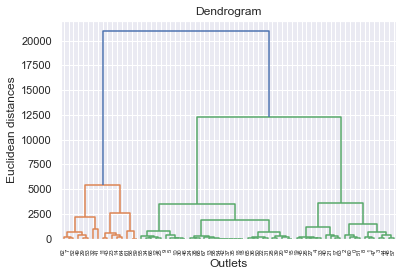

In [195]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Outlets')
plt.ylabel('Euclidean distances')
plt.show()

In [196]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [197]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


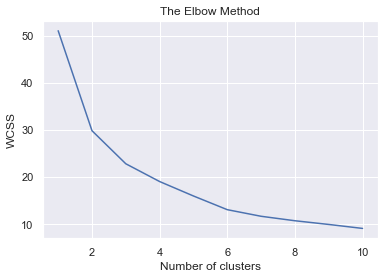

In [198]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

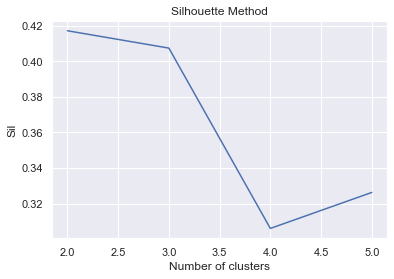

2:0.4171046143305979
3:0.40734679374891847
4:0.3060128961632981
5:0.32623040009743665


In [199]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters = k).fit(df)  
    preds = kmeans.fit_predict(df)
    sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
    print(str(i+2) +":"+ str(sil[i]))

In [202]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех', 'Торговельна площа, кв. м.', 'Количество касс', 'Тип', 'Рейтинг в гуглі', 'Количество чеков', 'Средний чек', 'Офіси', 'Середній дохід наелення,грн', 'Магазин мобільного звязку']).round(2)

,Успех,"Торговельна площа, кв. м.",Количество касс,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,"Середній дохід наелення,грн",Магазин мобільного звязку
0,0.0,0.22,0.28,0.07,0.59,0.25,0.24,0.20,0.62,0.00
1,1.0,0.35,0.15,0.46,0.70,0.62,0.39,0.21,0.59,0.13


In [205]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['age','income','delays']).round()

ValueError: Shape of passed values is (2, 2), indices imply (2, 3)

In [206]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

ValueError: Found input variables with inconsistent numbers of samples: [67, 69]